In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

#### IMPORTING NATURAL LANGUAGE TOOLKIT

In [29]:
import nltk

###### READING EXCEL DATA 

In [30]:
#Reading data
df=pd.read_excel('Train data set.xlsx')

In [6]:
df.head()

,Category,Sno,Text
0,neutral,1,"According to Gran , the company has no plans t..."
1,neutral,2,Technopolis plans to develop in stages an area...
2,negative,3,The international electronic industry company ...
3,positive,4,With the new production plant the company woul...
4,positive,5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [7]:
print(df.shape)

(3892, 3)


#### QUICK EDA

<AxesSubplot:title={'center':'Count of Categories'}>

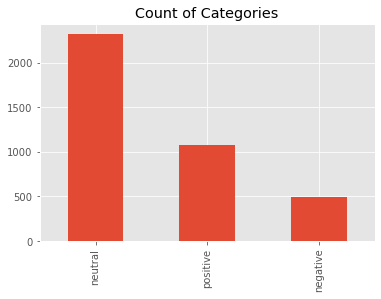

In [31]:

df['Category'].value_counts().plot(kind='bar',title='Count of Categories')

#### BASIC NLTK


#### 1. TOKENIZATION OF FIRST  ROW TEXT

In [9]:
tokens = nltk.word_tokenize(df['Text'][0])
tokens

['According',
 'to',
 'Gran',
 ',',
 'the',
 'company',
 'has',
 'no',
 'plans',
 'to',
 'move',
 'all',
 'production',
 'to',
 'Russia',
 ',',
 'although',
 'that',
 'is',
 'where',
 'the',
 'company',
 'is',
 'growing',
 '.']

#### 2. TAGGING TOKENS OF FIRST ROW TEXT

In [10]:
#tags
tagged=nltk.pos_tag(tokens)
tagged

[('According', 'VBG'),
 ('to', 'TO'),
 ('Gran', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('company', 'NN'),
 ('has', 'VBZ'),
 ('no', 'DT'),
 ('plans', 'NNS'),
 ('to', 'TO'),
 ('move', 'VB'),
 ('all', 'DT'),
 ('production', 'NN'),
 ('to', 'TO'),
 ('Russia', 'NNP'),
 (',', ','),
 ('although', 'IN'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('where', 'WRB'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('is', 'VBZ'),
 ('growing', 'VBG'),
 ('.', '.')]

#### 3. CREATING CHUNKS OF FIRST ROW TEXT

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  According/VBG
  to/TO
  (GPE Gran/NNP)
  ,/,
  the/DT
  company/NN
  has/VBZ
  no/DT
  plans/NNS
  to/TO
  move/VB
  all/DT
  production/NN
  to/TO
  (GPE Russia/NNP)
  ,/,
  although/IN
  that/DT
  is/VBZ
  where/WRB
  the/DT
  company/NN
  is/VBZ
  growing/VBG
  ./.)


## VADER

#### EACH WORD OF THE TEXT IS SCORED 
#### To know the sentiment of the text the COMPOUND SCORE is considered.  It ranges from -1 to 1.

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
from tqdm.notebook import tqdm

#### Vader is loaded from nltk

In [15]:
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
sia

#### All the special characters are removed from the text in each row

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 3892):
  review =re.sub(r'[^\w\s]','', df['Text'][i])
  corpus.append(review)
corpus

['According to Gran  the company has no plans to move all production to Russia  although that is where the company is growing ',
 'Technopolis plans to develop in stages an area of no less than 100000 square meters in order to host companies working in computer technologies and telecommunications  the statement said ',
 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility  contrary to earlier layoffs the company contracted the ranks of its office workers  the daily Postimees reported ',
 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability ',
 'FINANCING OF ASPOCOMP S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs ',
 'For the last quarter of 2010  Componenta s net sales dou

In [21]:
df=df.head(3892)

In [22]:
corpusdf= pd.DataFrame(corpus)
corpusdf.rename(columns = {0:'Text'}, inplace=True)
corpusdf


,Text
0,According to Gran the company has no plans to...
1,Technopolis plans to develop in stages an area...
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,FINANCING OF ASPOCOMP S GROWTH Aspocomp is agg...
...,...
3887,HELSINKI Thomson Financial Shares in Cargotec...
3888,LONDON MarketWatch Share prices ended lower i...
3889,Rinkuskiai s beer sales fell by 65 per cent to...
3890,Operating profit fell to EUR 354 mn from EUR 6...


#### Creating a dataframe of the cleaned data

In [23]:
concat = pd.concat([df['Sno'], corpusdf], join = 'outer', axis = 1)
concat

,Sno,Text
0,1,According to Gran the company has no plans to...
1,2,Technopolis plans to develop in stages an area...
2,3,The international electronic industry company ...
3,4,With the new production plant the company woul...
4,5,FINANCING OF ASPOCOMP S GROWTH Aspocomp is agg...
...,...,...
3887,3888,HELSINKI Thomson Financial Shares in Cargotec...
3888,3889,LONDON MarketWatch Share prices ended lower i...
3889,3890,Rinkuskiai s beer sales fell by 65 per cent to...
3890,3891,Operating profit fell to EUR 354 mn from EUR 6...


In [25]:
df1=pd.DataFrame(concat)

#### Runnung the polarity score on the entire data

In [26]:
res={}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    text=row['Text']
    num=row['Sno']
    res[num]=sia.polarity_scores(text)
    res

  0%|          | 0/3892 [00:00<?, ?it/s]

In [27]:
res

{1: {'neg': 0.092, 'neu': 0.837, 'pos': 0.071, 'compound': -0.128},
 2: {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'compound': -0.296},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.038, 'neu': 0.66, 'pos': 0.302, 'compound': 0.8555},
 5: {'neg': 0.153, 'neu': 0.646, 'pos': 0.202, 'compound': 0.3485},
 6: {'neg': 0.065, 'neu': 0.852, 'pos': 0.082, 'compound': 0.1531},
 7: {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.4404},
 8: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404},
 9: {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.5574},
 10: {'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.8176},
 11: {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.4939},
 12: {'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.296},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.5267},
 15: {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4939},
 16: {'neg': 0

#### Dataframe containing the final polarity score of the texts, which will be used for classification

In [28]:
df2=pd.DataFrame(res).T
df2

,neg,neu,pos,compound
1,0.092,0.837,0.071,-0.1280
2,0.073,0.927,0.000,-0.2960
3,0.000,1.000,0.000,0.0000
4,0.038,0.660,0.302,0.8555
5,0.153,0.646,0.202,0.3485
...,...,...,...,...
3888,0.050,0.745,0.204,0.6597
3889,0.281,0.644,0.075,-0.7269
3890,0.000,1.000,0.000,0.0000
3891,0.000,0.751,0.249,0.7430
